# 2. Multiple Linear Regression

### 원 핫 인코딩

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('MultipleLInearRegressionData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [3]:
X,y

(array([[0.5, 3, 'Home'],
        [1.2, 4, 'Library'],
        [1.8, 2, 'Cafe'],
        [2.4, 0, 'Cafe'],
        [2.6, 2, 'Home'],
        [3.2, 0, 'Home'],
        [3.9, 0, 'Library'],
        [4.4, 0, 'Library'],
        [4.5, 5, 'Home'],
        [5.0, 1, 'Cafe'],
        [5.3, 2, 'Cafe'],
        [5.8, 0, 'Cafe'],
        [6.0, 3, 'Library'],
        [6.1, 1, 'Cafe'],
        [6.2, 1, 'Library'],
        [6.9, 4, 'Home'],
        [7.2, 2, 'Cafe'],
        [8.4, 1, 'Home'],
        [8.6, 1, 'Library'],
        [10.0, 0, 'Library']], dtype=object),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first'),[2])], remainder = 'passthrough')
X = ct.fit_transform(X)
X

# 1 0 : Home
# 0 1 : Library
# 0 0 : Cafe


array([[1.0, 0.0, 0.5, 3],
       [0.0, 1.0, 1.2, 4],
       [0.0, 0.0, 1.8, 2],
       [0.0, 0.0, 2.4, 0],
       [1.0, 0.0, 2.6, 2],
       [1.0, 0.0, 3.2, 0],
       [0.0, 1.0, 3.9, 0],
       [0.0, 1.0, 4.4, 0],
       [1.0, 0.0, 4.5, 5],
       [0.0, 0.0, 5.0, 1],
       [0.0, 0.0, 5.3, 2],
       [0.0, 0.0, 5.8, 0],
       [0.0, 1.0, 6.0, 3],
       [0.0, 0.0, 6.1, 1],
       [0.0, 1.0, 6.2, 1],
       [1.0, 0.0, 6.9, 4],
       [0.0, 0.0, 7.2, 2],
       [1.0, 0.0, 8.4, 1],
       [0.0, 1.0, 8.6, 1],
       [0.0, 1.0, 10.0, 0]], dtype=object)

### 데이터 세트 분리

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

### 학습( 다중 선형 회귀)

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### 예측 값과 실제 값 비교(테스트 세트)

In [7]:
y_pred = reg.predict(X_test)

In [8]:
y_pred # test데이터 예측값

array([ 92.15457859,  10.23753043, 108.36245302,  38.14675204])

In [9]:
y_test # 실제 값

array([ 90,   8, 100,  38], dtype=int64)

In [10]:
reg.coef_

array([-5.82712824, -1.04450647, 10.40419528, -1.64200104])

In [11]:
reg.intercept_

5.365006706544733

### 모델 평가

In [12]:
reg.score(X_train, y_train)

0.9623352565265528

In [14]:
reg.score(X_test, y_test)

0.9859956178877445

### 다양한 평가 지표(회귀 모델)

1. MAE(Mean Absolute Error) : 실제값과 예측값 차이의 절대값
2. MSE(Mean Squared Error) : 차이의 제곱
3. RMSE(Root Mean Squared Error) : 차이의 제곱에 루트
4. R2 : 결정계수(1에 가까울수록 잘 예측한것)

나머지는 0에 가까울수록 좋음

In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred) # 실제 값, 예측값 # MAE

3.225328518828811

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred) # 실제 값, 예측값 # MSE

19.90022698151514

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared = False) # RMSE

4.460967045553591

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # R2 -> reg.score와 값이 동일

0.9859956178877445

## 원핫 인코딩

In [20]:
import pandas as pd

In [23]:
df = pd.read_csv('MultipleLInearRegressionData.csv')

In [31]:
df.head()

,hour,absent,place,score
0,0.5,3,Home,10
1,1.2,4,Library,8
2,1.8,2,Cafe,14
3,2.4,0,Cafe,26
4,2.6,2,Home,22


In [34]:
df=pd.get_dummies(df,columns=['place'])

In [36]:
df.head()

,hour,absent,score,place_Cafe,place_Home,place_Library
0,0.5,3,10,0,1,0
1,1.2,4,8,0,0,1
2,1.8,2,14,1,0,0
3,2.4,0,26,1,0,0
4,2.6,2,22,0,1,0


In [38]:
X = df.drop(columns = ['score'])
y = df['score']

In [39]:
import

,hour,absent,place_Cafe,place_Home,place_Library
0,0.5,3,0,1,0
1,1.2,4,0,0,1
2,1.8,2,1,0,0
3,2.4,0,1,0,0
4,2.6,2,0,1,0
5,3.2,0,0,1,0
6,3.9,0,0,0,1
7,4.4,0,0,0,1
8,4.5,5,0,1,0
9,5.0,1,1,0,0


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [43]:
reg.predict(X_test)

array([ 92.15457859,  10.23753043, 108.36245302,  38.14675204])

In [44]:
y_test

18     90
1       8
19    100
8      38
Name: score, dtype: int64

In [45]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

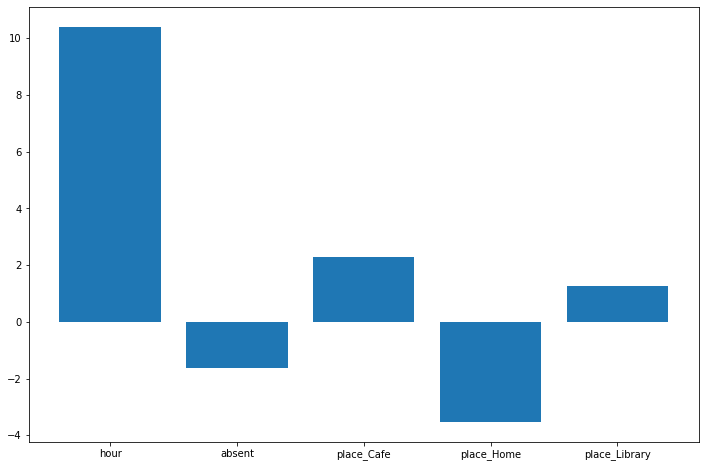

In [46]:
plt.figure(figsize=(12,8))
plt.bar(X.columns, reg.coef_,)

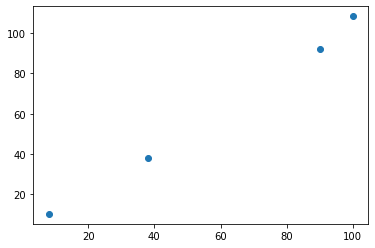

In [52]:
plt.scatter(y_test,y_pred)

In [53]:
X_std = (X-X.mean())/X.std()

In [54]:
X_std

,hour,absent,place_Cafe,place_Home,place_Library
0,-1.755406,0.911729,-0.715219,1.488847,-0.715219
1,-1.482343,1.562964,-0.715219,-0.638077,1.328264
2,-1.248289,0.260494,1.328264,-0.638077,-0.715219
3,-1.014235,-1.041976,1.328264,-0.638077,-0.715219
4,-0.936217,0.260494,-0.715219,1.488847,-0.715219
5,-0.702163,-1.041976,-0.715219,1.488847,-0.715219
6,-0.429099,-1.041976,-0.715219,-0.638077,1.328264
7,-0.234054,-1.041976,-0.715219,-0.638077,1.328264
8,-0.195045,2.214199,-0.715219,1.488847,-0.715219
9,0.000000,-0.390741,1.328264,-0.638077,-0.715219


In [55]:
reg.fit(X_std,y)

LinearRegression()

<BarContainer object of 5 artists>

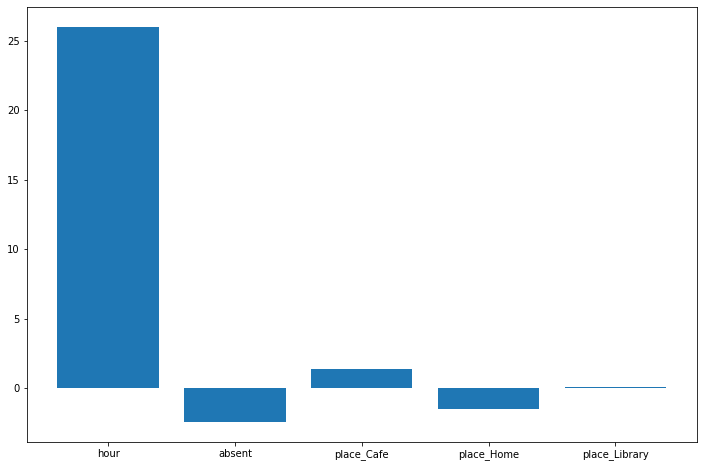

In [56]:
plt.figure(figsize=(12,8))
plt.bar(X_std.columns, reg.coef_)